1. Data 구성방법
    - Traing Data : Aiffel에서 찍은 사진 데이터(rock:641, scissor:563, paper:661)
    - Test Data : 공개된 가위바위보 사진데이터(각 840개)   
   
2. 모델구성방식
    - 케라스 모델링에 익숙하지 않아 exploration에서 학습한 cnn 모델 사용
    - 정확도를 높이기위한 방법으로 하이퍼파라미터 조정
    - 28*28 사진이 사람의 눈으로 구분되지 않을만큼 찌그러져 원본데이터로 학습시켜 보았으나, 테스트 데이터의 정확도에는 영향이 적어 해당 방법은 사용하지 않음
    - 채널, dense, epoch에 대해 나머지 파라미터를 고정시켜 둔 후, 하나의 파라미터를 1단위로 조정하며, 최대 정확도가 나오는 경우의 파라미터를 최종 모델링에 사용   
   
3. 최종 학습 기록
    - test_accuracy : 0.5686507821083069
    - test_loss: 8.610386848449707 

In [1]:
from PIL import Image
import os, glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/aiffel_set"
target_size=(28,28)
for path in ['rock', 'scissor', 'paper']:
    image_path = image_dir_path + '/' + path
    images=glob.glob(image_path + "/*.jpg")  
    print(f'len({path}) = ', len(images))
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

len(rock) =  641
len(scissor) =  563
len(paper) =  661


In [3]:
641+563+661

1865

In [4]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1865   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1865 입니다.
x_train shape: (1865, 28, 28, 3)
y_train shape: (1865,)


In [143]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=150
n_channel_2=110
n_dense= 128
n_train_epoch= 9
img_size = 28

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 150)       4200      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 150)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 110)       148610    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 110)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 2750)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               352128    
_________________________________________________________________
dense_53 (Dense)             (None, 3)               

In [144]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/15
59/59 [==============================] - 0s 3ms/step - loss: 9.6162 - accuracy: 0.4032
Epoch 2/15
59/59 [==============================] - 0s 3ms/step - loss: 0.9976 - accuracy: 0.4874
Epoch 3/15
59/59 [==============================] - 0s 3ms/step - loss: 0.8997 - accuracy: 0.5759
Epoch 4/15
59/59 [==============================] - 0s 3ms/step - loss: 0.7931 - accuracy: 0.6536
Epoch 5/15
59/59 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.7223
Epoch 6/15
59/59 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7743
Epoch 7/15
59/59 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.8198
Epoch 8/15
59/59 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8772
Epoch 9/15
59/59 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.9040
Epoch 10/15
59/59 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9217
Epoch 11/15
59/59 [

In [145]:
# 사이즈 변경시에만 사용하기
target_size=(img_size, img_size)
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/open_set"
for path in ['rock', 'scissor', 'paper']:
    image_path2 = image_dir_path2 + '/' + path
    images=glob.glob(image_path2 + "/*.png")  
    print(f'len({path}) = ', len(images))
    for img in images:
        old_img=Image.open(img)
        # print('size = ', old_img.size)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

len(rock) =  840
len(scissor) =  840
len(paper) =  840


In [146]:
840*3

2520

In [147]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2520   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

(x_test, y_test)=load_data(image_dir_path2)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 2520 입니다.
x_test shape: (2520, 28, 28, 3)
y_test shape: (2520,)


In [148]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

79/79 - 0s - loss: 23.6615 - accuracy: 0.4278
test_loss: 23.661457061767578 
test_accuracy: 0.4277777671813965


In [171]:
li = []
max_acc = 0
max_i = 0
for i in range(5, 30):
    n_channel_1= i
    n_channel_2= 95
    n_dense= 101
    n_train_epoch= 9
    img_size = 28

    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=n_train_epoch)
    test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
    
    li.append(test_accuracy)
    if max_acc < test_accuracy:
        max_i = i
        max_acc = test_accuracy

Epoch 1/9
59/59 [==============================] - 6s 104ms/step - loss: 6.1989 - accuracy: 0.4032
Epoch 2/9
59/59 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.6113
Epoch 3/9
59/59 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.7147
Epoch 4/9
59/59 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.8107
Epoch 5/9
59/59 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8558
Epoch 6/9
59/59 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8901
Epoch 7/9
59/59 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8638
Epoch 8/9
59/59 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9357
Epoch 9/9
59/59 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.9539
79/79 - 3s - loss: 6.8639 - accuracy: 0.4956
Epoch 1/9
59/59 [==============================] - 6s 102ms/step - loss: 7.1982 

59/59 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9995
79/79 - 3s - loss: 12.3743 - accuracy: 0.5226
Epoch 1/9
59/59 [==============================] - 6s 105ms/step - loss: 9.2464 - accuracy: 0.4204
Epoch 2/9
59/59 [==============================] - 0s 1ms/step - loss: 0.7318 - accuracy: 0.6847
Epoch 3/9
59/59 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.8198
Epoch 4/9
59/59 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8820
Epoch 5/9
59/59 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9206
Epoch 6/9
59/59 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9491
Epoch 7/9
59/59 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9678
Epoch 8/9
59/59 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9877
Epoch 9/9
59/59 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy:

59/59 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9893
Epoch 9/9
59/59 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9941
79/79 - 3s - loss: 18.4835 - accuracy: 0.4294
Epoch 1/9
59/59 [==============================] - 6s 105ms/step - loss: 5.4485 - accuracy: 0.4402
Epoch 2/9
59/59 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.7212
Epoch 3/9
59/59 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8477
Epoch 4/9
59/59 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9067
Epoch 5/9
59/59 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9598
Epoch 6/9
59/59 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9802
Epoch 7/9
59/59 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9930
Epoch 8/9
59/59 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy:

131
0.6392857432365417


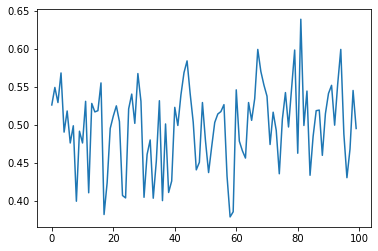

In [154]:
#     n_channel_1= i
#     n_channel_2=110
#     n_dense= 128
#     n_train_epoch= 15
#     img_size = 28
print(max_i)
print(max_acc)
plt.plot(cha_1_li)
plt.show()

28
0.5765873193740845


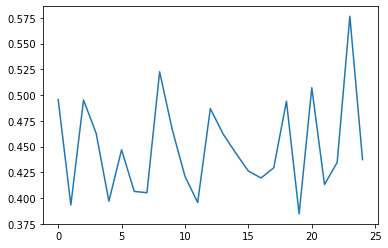

In [172]:
#     n_channel_1= 131
#     n_channel_2= i
#     n_dense= 128
#     n_train_epoch= 15
#     img_size = 28
print(max_i)
print(max_acc)
plt.plot(li)
plt.show()

101
0.5892857313156128


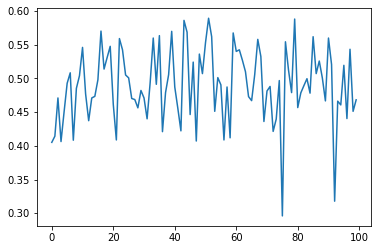

In [159]:
#     n_channel_1= 131
#     n_channel_2= 127
#     n_dense= i
#     n_train_epoch= 15
#     img_size = 28
print(max_i)
print(max_acc)
plt.plot(li)
plt.show()

9
0.553174614906311


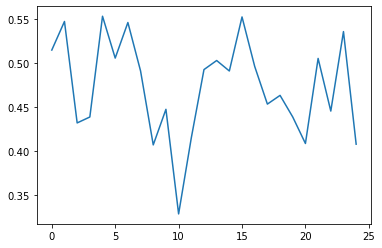

In [163]:
#     n_channel_1= 131
#     n_channel_2= 95
#     n_dense= 101
#     n_train_epoch= i
#     img_size = 28
print(max_i)
print(max_acc)
plt.plot(li)
plt.show()

In [170]:
n_channel_1= 131
n_channel_2= 90
n_dense= 101
n_train_epoch= 9
img_size = 28

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/9
59/59 [==============================] - 0s 3ms/step - loss: 6.5952 - accuracy: 0.3378
Epoch 2/9
59/59 [==============================] - 0s 2ms/step - loss: 1.0189 - accuracy: 0.4676
Epoch 3/9
59/59 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.6043
Epoch 4/9
59/59 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.6933
Epoch 5/9
59/59 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7850
Epoch 6/9
59/59 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8391
Epoch 7/9
59/59 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8810
Epoch 8/9
59/59 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9110
Epoch 9/9
59/59 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9249
79/79 - 0s - loss: 8.6104 - accuracy: 0.5687
test_loss: 8.610386848449707 
test_accuracy: 0.5686507821083069
